In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pencil as pc
from IPython.display import display, Math, Latex

         pencil has moved to pencil_old.
To change your scripts accordingly:
import pencilnew as pc -> import pencil as pc
import pencil as pc -> import pencil_old as pc


In [2]:
#reading the grid
grid = pc.read.grid(trim=True)
z = grid.z

reading grid data from processor 27 of 60 ...
reading grid data from processor 54 of 60 ...
reading grid data from processor 39 of 60 ...
reading grid data from processor 57 of 60 ...
reading grid data from processor 19 of 60 ...
reading grid data from processor 56 of 60 ...
reading grid data from processor 30 of 60 ...
reading grid data from processor 40 of 60 ...
reading grid data from processor 5 of 60 ...
reading grid data from processor 1 of 60 ...
reading grid data from processor 2 of 60 ...
reading grid data from processor 47 of 60 ...
reading grid data from processor 33 of 60 ...
reading grid data from processor 42 of 60 ...
reading grid data from processor 36 of 60 ...
reading grid data from processor 31 of 60 ...
reading grid data from processor 46 of 60 ...
reading grid data from processor 14 of 60 ...
reading grid data from processor 35 of 60 ...
reading grid data from processor 34 of 60 ...
reading grid data from processor 58 of 60 ...
reading grid data from processor 20 o

In [3]:
ts = pc.read.ts()

Read 24451 lines.


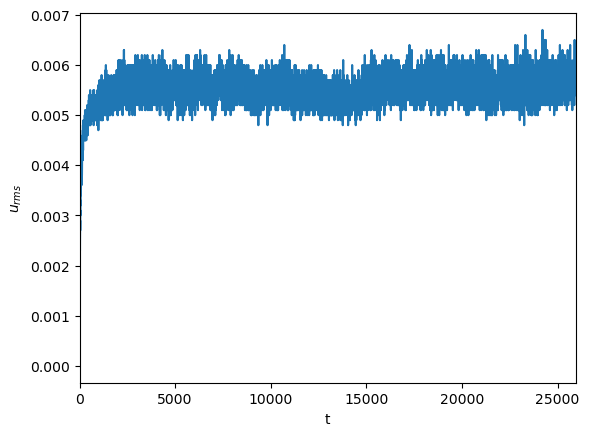

In [4]:
plt.plot(ts.t, ts.urms)
plt.xlim(ts.t[0], ts.t[-1])
plt.xlabel("t")
plt.ylabel(r"$u_{rms}$")
plt.show()

In [5]:
#reading the var file
# var = pc.read.var(magic=["pp"], trimall=True)
# var = pc.read.var(trimall=True)

In [6]:
xyaver = pc.read.aver(plane_list='xy')

In [7]:
xyaver.xy.TTmz.shape

(24451, 300)

In [8]:
# var.t

In [9]:
# var.keys()

In [10]:
# pre = np.average(var.pp, axis=(-1,-2))
# rho = np.average(var.lnrho, axis=(-1,-2))
# tem = np.average(var.tem, axis=(-1,-2))

In [11]:
# xyaver.xy.TTmz[1]

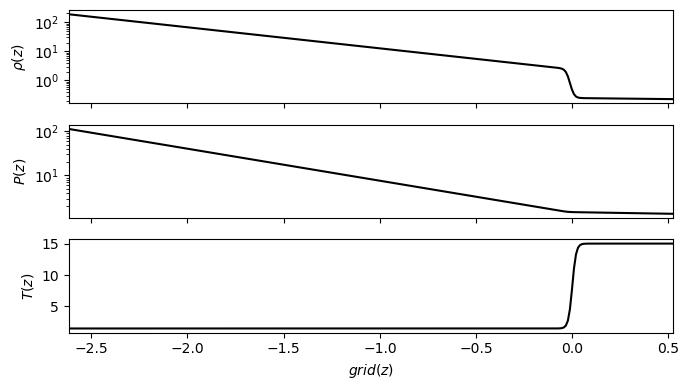

In [12]:
fig, axs = plt.subplots(3,1, figsize=(7,4), sharex=True)

# axs[0].plot(z, rho, color='k')
# axs[1].plot(z, pre, color='k')
axs[0].plot(z, xyaver.xy.rhomz[0], color='k')
axs[1].plot(z, xyaver.xy.ppmz[0], color='k')
axs[2].plot(z, xyaver.xy.TTmz[0], color='k')

axs[0].set_yscale("log")
axs[1].set_yscale("log")
axs[1].set_xlim(z[0], z[-1])
axs[0].set_ylabel(r"$\rho(z)$")
axs[1].set_ylabel(r"$P(z)$")
axs[2].set_ylabel(r"$T(z)$")

plt.xlabel(r"$grid (z)$")
plt.tight_layout()
#plt.savefig("variation.jpg")

In [13]:
yaver = pc.read.aver(plane_list='y')

In [14]:
uz_real = yaver.y.uzmxz

In [15]:
uz_real.shape

(1297, 1024, 300)

In [16]:
indx_t1 = np.argmin(np.abs(yaver.t - 200))  #to avoid the transient effects below t=170
indx_t2 = np.argmin(np.abs(yaver.t - yaver.t[-1]))

In [17]:
np.shape(yaver.t)

(1297,)

In [18]:
# uz_fourier = mode.FT(uz_real[indx_t1:indx_t2,:,mode.indx_zref], 'ortho')

In [19]:
uz_fourier = np.fft.fftn(uz_real[indx_t1:indx_t2,:,251], s=None, axes=(-2, -1), norm='ortho')
uz_fourier.shape

(1286, 1024)

In [20]:
logP = np.log(np.abs(uz_fourier))#/D**2))

In [21]:
size = np.shape(uz_real)
#size
nx = size[1]
nz = size[2]
nt = size[0]

tt = yaver.t
len(grid.x)

1024

In [22]:
param = pc.read.param()

In [23]:
lxyz = param.lxyz   #shape of the box
grz = -param.gravz  #value of g along z direction
cp = param.cp
lx = lxyz[0]
ly = lxyz[1]
lz = lxyz[2]
lz

3.1416

In [24]:
t_gd = tt[indx_t1:indx_t2]  #time interval where urms has reached a steady state
t_len = np.size(t_gd)

dkx = 2*np.pi/lx    #unit step along kx direction
dom = 2*np.pi/t_len #unit step alomg omega direction

In [25]:
if t_len%2 == 0:
    fom = np.arange(0, t_len/2+1)
    rom = -np.flip(np.arange(1, t_len/2))
    om = np.concatenate((fom, rom))*dom
else:
    fom = np.arange(0, t_len/2)
    rom = -np.flip(np.arange(1, t_len/2))
    om = np.concatenate((fom, rom))*dom

In [26]:
if nx%2 == 0:
    fnx = np.arange(0, nx/2+1)
    rnx = -np.flip(np.arange(1, nx/2))
    kx = np.concatenate((fnx, rnx))*dkx
else:
    fnx = np.arange(0, nx/2)
    rnx = -np.flip(np.arange(1, nx/2))
    kx = np.concatenate((fnx, rnx))*dkx

In [27]:
k_tilde = kx#*L0
om_tilde = om#/omega0
np.shape(om_tilde), np.shape(k_tilde), np.shape(logP)
# k_tilde

((1286,), (1024,), (1286, 1024))

Locator attempting to generate 3917 ticks ([-21.405, ..., -1.8249999999999993]), which exceeds Locator.MAXTICKS (1000).


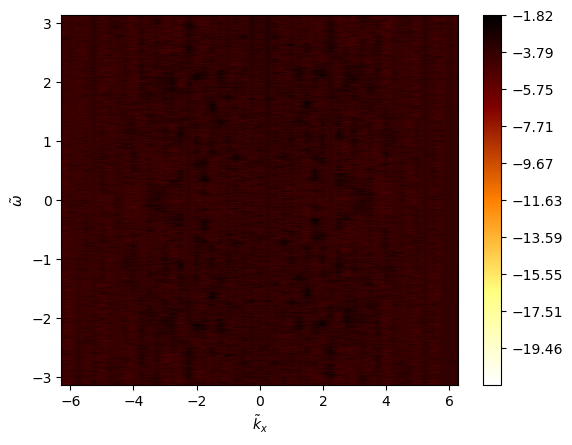

In [28]:
[X, Y] = np.meshgrid(k_tilde, om_tilde)
#plt.contourf(X, Y, logP, 1500, cmap='inferno', vmin=np.min(logP), vmax=np.max(logP))
plt.contourf(np.fft.fftshift(X), np.fft.fftshift(Y), np.fft.fftshift(logP), 4000, cmap='afmhot_r')#, vmin=-6, vmax=np.max(logP))
# plt.plot(aa, np.sqrt(grz*aa), ls='dashdot', c='k')
# plt.plot(k_tilde, cs_d*k_tilde, ls='-', c='k')
# plt.plot(k_tilde, cs_u*k_tilde, ls=':', c='k')
# plt.axvline(x=2, c='k')
plt.xlim(-2*np.pi,2*np.pi)
# plt.ylim(0,2*np.pi)
#plt.ylim(0,10)
plt.colorbar()
plt.xlabel(r"$\tilde{k}_x$")
plt.ylabel(r"$\tilde{\omega}$")
plt.savefig('k_om.png')
plt.show()